In [1]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling 
import statsmodels.formula.api as smf

# statistics 
import scipy.stats as stats

In [3]:
# read data Kindle
kindle_data = pd.read_csv("Kindle_Data_Cleaned_2.csv")

# memastikan tiap kolom tidak mengandung spasi yang tak terlihat
kindle_data.columns = kindle_data.columns.str.strip()

# menampilkan tiga data teratas kindle
kindle_data.head(3)

,asin,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,category_name,log_reviews,log_price
0,B01MXSF0Q6,""" Arrête avec tes mensonges "" - Prix Maison de...",Philippe Besson,INTERFORUM,4.3,3147,10.99,False,19,False,False,False,Foreign Language,8.054523,2.484073
1,B0963WTLJ5,"""A Gift From The Stars"" Kindle edition",elena danaan,Amazon.com Services LLC,4.5,0,4.99,False,15,False,False,False,Science & Math,0.000000,1.790091
2,B00D7MSXQQ,"""A Problem from Hell"": America and the Age of ...",Samantha Power,Hachette Book Group,4.6,877,15.99,False,14,False,False,False,Politics & Social Sciences,6.777647,2.832625


In [4]:
# menambah kolom sales yaitu perkalian antara reviews dan price
kindle_data["sales"] = kindle_data["price"] * kindle_data["reviews"]

kindle_data.head(3)

,asin,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,category_name,log_reviews,log_price,sales
0,B01MXSF0Q6,""" Arrête avec tes mensonges "" - Prix Maison de...",Philippe Besson,INTERFORUM,4.3,3147,10.99,False,19,False,False,False,Foreign Language,8.054523,2.484073,34585.53
1,B0963WTLJ5,"""A Gift From The Stars"" Kindle edition",elena danaan,Amazon.com Services LLC,4.5,0,4.99,False,15,False,False,False,Science & Math,0.000000,1.790091,0.00
2,B00D7MSXQQ,"""A Problem from Hell"": America and the Age of ...",Samantha Power,Hachette Book Group,4.6,877,15.99,False,14,False,False,False,Politics & Social Sciences,6.777647,2.832625,14023.23


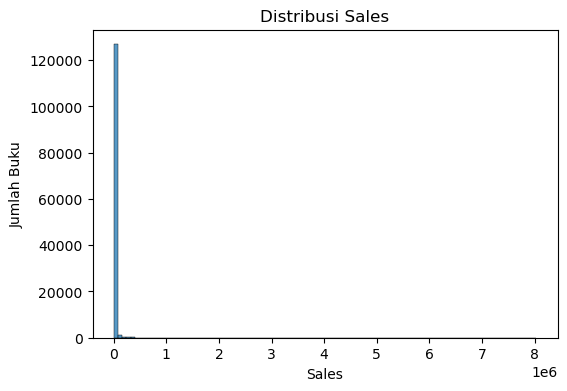

In [5]:
# Plot histogram untuk kolom sales
plt.figure(figsize=(6,4))
sns.histplot(kindle_data['sales'], bins=100)
plt.title("Distribusi Sales")
plt.xlabel("Sales")
plt.ylabel("Jumlah Buku")
plt.show()


In [6]:
# Kolom baru: log transform reviews
kindle_data['log_sales'] = np.log1p(kindle_data['sales'])

kindle_data.head(3)

,asin,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,category_name,log_reviews,log_price,sales,log_sales
0,B01MXSF0Q6,""" Arrête avec tes mensonges "" - Prix Maison de...",Philippe Besson,INTERFORUM,4.3,3147,10.99,False,19,False,False,False,Foreign Language,8.054523,2.484073,34585.53,10.451220
1,B0963WTLJ5,"""A Gift From The Stars"" Kindle edition",elena danaan,Amazon.com Services LLC,4.5,0,4.99,False,15,False,False,False,Science & Math,0.000000,1.790091,0.00,0.000000
2,B00D7MSXQQ,"""A Problem from Hell"": America and the Age of ...",Samantha Power,Hachette Book Group,4.6,877,15.99,False,14,False,False,False,Politics & Social Sciences,6.777647,2.832625,14023.23,9.548542


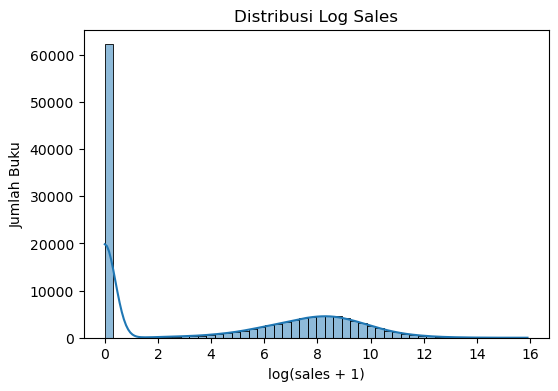

In [7]:
# Plot histogram untuk kolom log_sales
plt.figure(figsize=(6,4))
sns.histplot(kindle_data['log_sales'], kde=True, bins=50)
plt.title("Distribusi Log Sales")
plt.xlabel("log(sales + 1)")
plt.ylabel("Jumlah Buku")
plt.show()

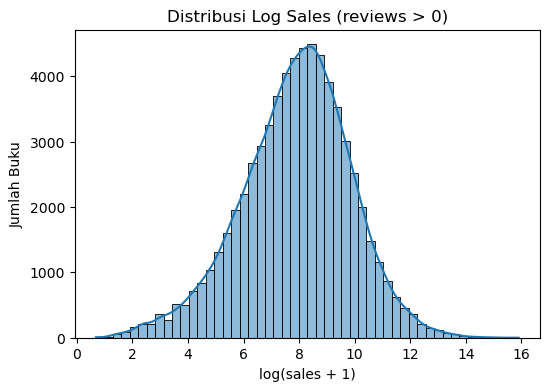

In [8]:
# memfilter kindle_data untuk data dengan reviews != 0
kindle_no_0_reviews = kindle_data.loc[kindle_data["reviews"] != 0]
kindle_no_0_reviews = kindle_no_0_reviews.copy()

# plot sales untuk reviews != 0
plt.figure(figsize=(6,4))
sns.histplot(kindle_no_0_reviews['log_sales'], kde=True, bins=50)
plt.title("Distribusi Log Sales (reviews > 0)")
plt.xlabel("log(sales + 1)")
plt.ylabel("Jumlah Buku")
plt.show()

In [9]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [10]:
# membuat model OLS untuk pengaruh stars terhadap log_sales
model = smf.ols("log_sales ~ stars", kindle_no_0_reviews)

# fit model
results = model.fit()

# extract hasil (Coefficient dan Standard Error) ke DataFrame
results_1 = print_coef_std_err(results)
results_1

,coef,std err
Intercept,4.986311,0.123204
stars,0.643400,0.027258


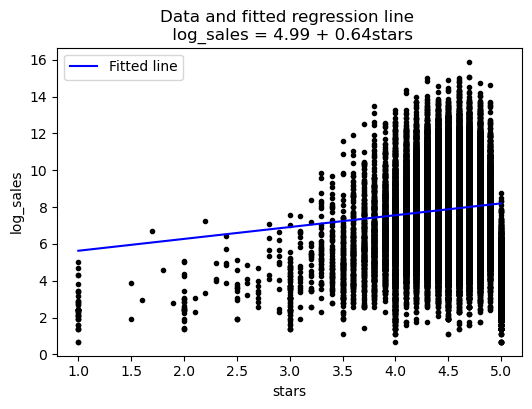

In [11]:
predictor = "stars"
outcome = "log_sales"
data = kindle_no_0_reviews.copy()
results_ = results_1.copy()

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_1.loc["Intercept"]["coef"]
b_hat = results_1.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("log_sales")
plt.xlabel("stars")

# Add a title and adjust the margins
plt.title(f"Data and fitted regression line \n {outcome} = {np.round(a_hat,2)} + {np.round(b_hat,2)}{predictor}")

# Show the plot
plt.show()

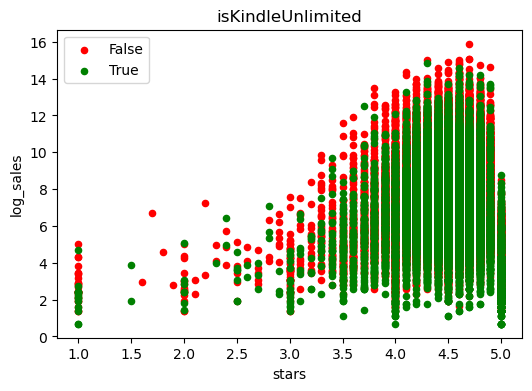

In [12]:
# stars and isKindleUnlimited vs. log_sales

fig, ax = plt.subplots(figsize=(6, 4))

# Define different color for each group data
colors = {True:"green", False:"red"}

grouped = kindle_no_0_reviews.groupby('isKindleUnlimited')

# Plot the data with different color
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='stars', y='log_sales', label=key, color=colors[key])

plt.title("isKindleUnlimited")
plt.show()

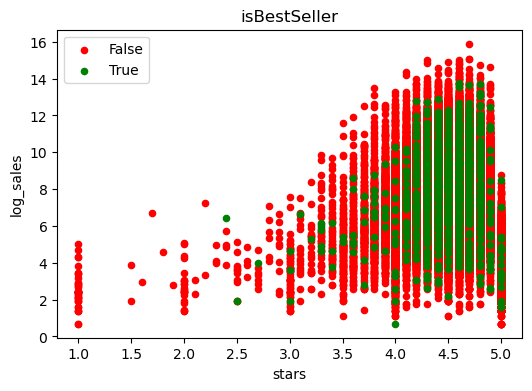

In [13]:
# stars and isBestSeller vs. log_sales

fig, ax = plt.subplots(figsize=(6, 4))

# Define different color for each group data
colors = {True:"green", False:"red"}

grouped = kindle_no_0_reviews.groupby('isBestSeller')

# Plot the data with different color
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='stars', y='log_sales', label=key, color=colors[key])

plt.title("isBestSeller")
plt.show()

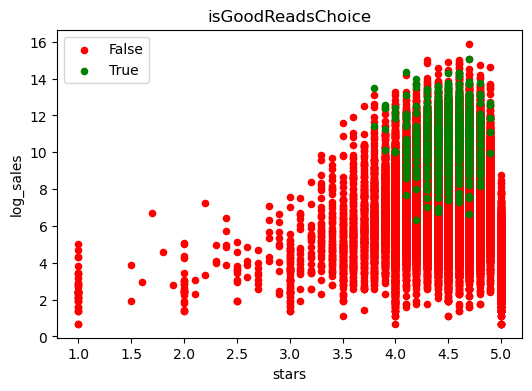

In [14]:
# stars and isGoodReadsChoice vs. log_sales

fig, ax = plt.subplots(figsize=(6, 4))

# Define different color for each group data
colors = {True:"green", False:"red"}

grouped = kindle_no_0_reviews.groupby('isGoodReadsChoice')

# Plot the data with different color
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='stars', y='log_sales', label=key, color=colors[key])

plt.title("isGoodReadsChoice")
plt.show()

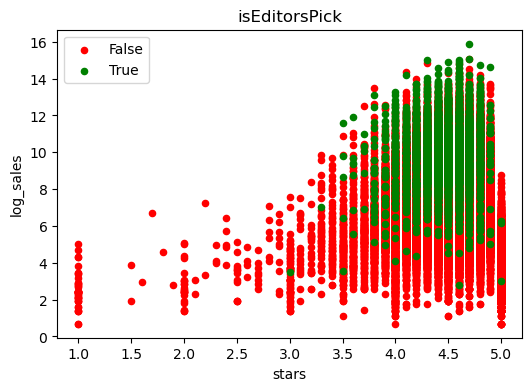

In [15]:
# stars and isEditorsPick vs. log_sales

fig, ax = plt.subplots(figsize=(6, 4))

# Define different color for each group data
colors = {True:"green", False:"red"}

grouped = kindle_no_0_reviews.groupby('isEditorsPick')

# Plot the data with different color
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='stars', y='log_sales', label=key, color=colors[key])

plt.title("isEditorsPick")
plt.show()

In [16]:
# convert variable isEditorsPick dalam bentuk numerik menggunakan LabelEncoder
from sklearn.preprocessing import LabelEncoder

# membuat object LabelEncoder dam transformasi variable isEditorsPick
kindle_no_0_reviews["isEditorsPick"] = LabelEncoder().fit_transform(kindle_no_0_reviews["isEditorsPick"])

# tampilkan 5 data teratas setelah ditransformasi
kindle_no_0_reviews[["isEditorsPick","log_sales"]].head()

,isEditorsPick,log_sales
0,0,10.451220
2,0,9.548542
4,0,8.444928
5,0,7.607446
7,0,7.950911


In [17]:
# membuat model OLS untuk pengaruh stars dan isEditorsPick terhadap log_sales (termasuk interaksi stars and isEditorsPick)
model = smf.ols('log_sales ~ stars + isEditorsPick + isEditorsPick:stars', kindle_no_0_reviews)

# fit model
results = model.fit()

# extract hasil (Coefficient dan Standard Error) ke DataFrame
results_stars_editor_inter = print_coef_std_err(results)
results_stars_editor_inter

,coef,std err
Intercept,4.595067,0.122331
stars,0.710163,0.027048
isEditorsPick,1.168855,0.702473
isEditorsPick:stars,0.202353,0.157610


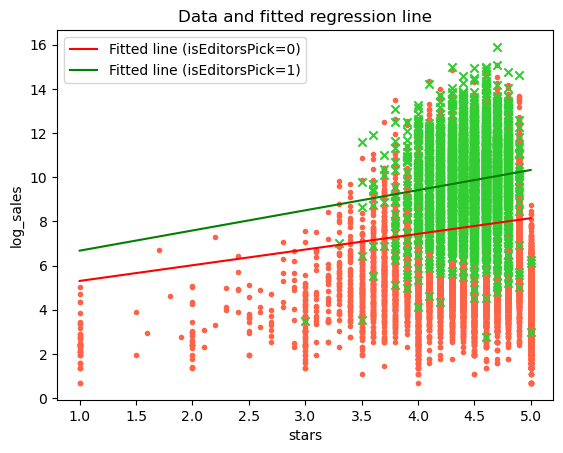

In [19]:
predictors = ["stars","isEditorsPick","isEditorsPick:stars"]
outcome = "log_sales"
data = kindle_no_0_reviews.copy()
results_ = results_stars_editor_inter.copy()

c = {0 : "tomato", 1: "limegreen"}
c_line = {0 : "r", 1: "g"}
markers = {0 : ".", 1: "x"}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
                color = c[i], marker = markers[i])

# Calculate the fitted values for two lines regarding the isEditorsPick
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c_line[i], label = f"Fitted line (isEditorsPick={i})")

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [20]:
# nilai sales untuk isEditorsPick=0 dan stars=0
print(f"${np.round(np.expm1(4.6),2)}")

$98.48


In [21]:
# nilai selisih peningkatan sales untuk data dengan isEditorsPick=0 dan perbedaan satu angka stars
print(f"{np.round(np.expm1(0.71) * 100,2)}%")

103.4%


In [22]:
# nilai sales untuk isEditorsPick=1 dan stars=0
print(f"${np.round(np.expm1(5.76),2)}")

$316.35


In [23]:
# nilai selisih peningkatan sales untuk data dengan isEditorsPick=0 dan perbedaan satu angka stars
print(f"{np.round(np.expm1(0.91) * 100,2)}%")

148.43%


In [24]:
np.expm1(5.76)/np.expm1(4.6)

3.2121696419968018